# Keras

https://keras.io/ko/getting-started/sequential-model-guide/

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

model.summary()

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

#### optimizer
https://keras.io/ko/optimizers/

In [ ]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

### Exercise 1 (binary classification)

Please complete the code so that training works properly.  

In [ ]:
# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

model = Sequential()
model.add(Dense( (1)_____  , activation='relu', input_dim= (2)_____ ))  ### Fill the blank
model.add(Dense( (3)_____  , activation= (4)_____ ))                    ### Fill the blank
model.compile(optimizer='rmsprop',
              loss= (5)_____ ,                                          ### Fill the blank
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

### Exercise 2 (multiclass classification)

Please complete the code so that training works properly.  

In [ ]:
# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

model = Sequential()
model.add(Dense( (1)_____ , activation='relu', input_dim= (2)_____ ))   ### Fill the blank
model.add(Dense( (3)_____ , activation= (4)_____ ))                     ### Fill the blank
model.compile(optimizer='rmsprop',
              loss= (5)_____ ,                                          ### Fill the blank
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

# Keras on mnist

https://keras.io/examples/vision/mnist_convnet/

### Exercise 3

### data preprocessing

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    for x in mat:
        for y in x:
            print('%3s'%y, end=' ')
        print()

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape)
print("x_train[0] shape:", x_train[0].shape)
# matprint(x_train[0])

In [ ]:
# plt.imshow(x_train[0], cmap='gray')

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = x_train[0].shape

In [ ]:
# convert class vectors to binary class matrices
print('before y shape:', y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('after  y shape:', y_train.shape)

#### model structure and training

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [ ]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

### Exercise 4: draw learning curve
https://www.kaggle.com/code/tobikaggle/keras-mnist-cnn-learning-curve

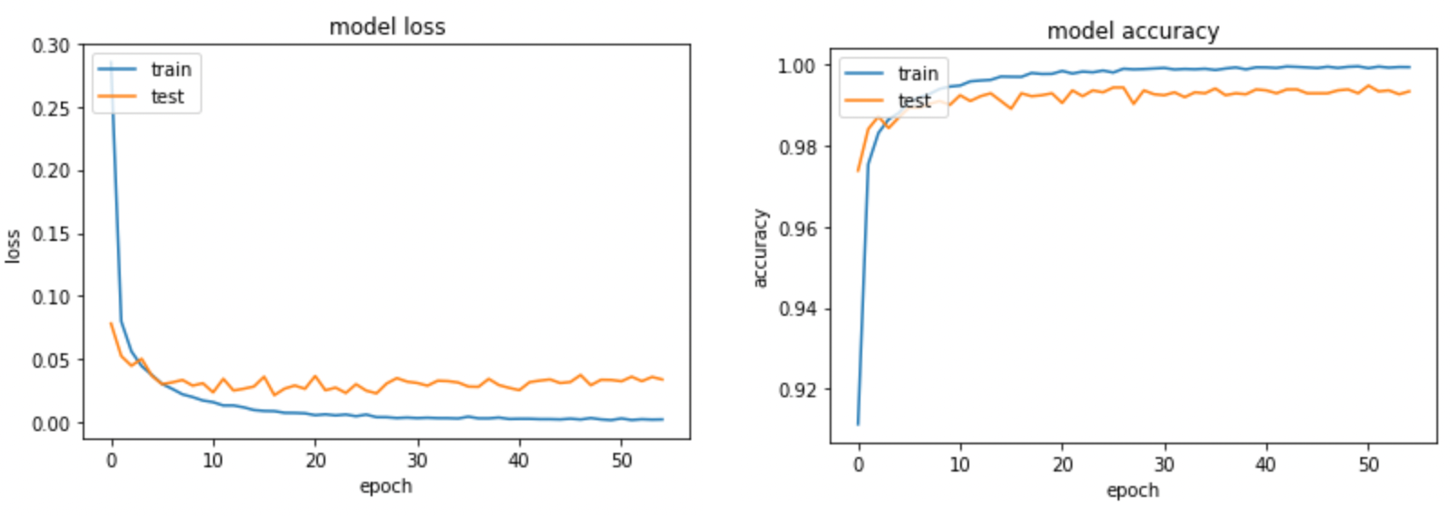

In [ ]:
# Write your code to draw learning curve

# Keras on Breast cancer dataset

### Exercise 5: keras on breast cancer dataset

data preprocessing

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split # to split the data into two parts
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
data = datasets.load_breast_cancer()
x = data.data
y = data.target

In [ ]:
print(x.shape, y.shape)
print(np.unique(y))

In [ ]:
y = keras.utils.to_categorical(y, 2)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model building

In [ ]:
num_classes = 2
input_shape = x.shape[1]

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),   
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [ ]:
batch_size = 128
epochs = 50

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])